In [26]:
import pandas as pd
import numpy as np


from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_excel('Rent.xlsx')
df

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100
5,1900,32500
6,1500,20000
7,1850,24500
8,2700,48000
9,2100,31000


In [5]:
df.shape

(60, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    60 non-null     int64
 1   rent    60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [7]:
df.describe()

,area,rent
count,60.000000,60.000000
mean,2289.000000,37269.166667
std,538.880509,11770.736234
min,1200.000000,20000.000000
25%,1900.000000,31000.000000
50%,2130.000000,34450.000000
75%,2700.000000,47625.000000
max,3500.000000,70500.000000


In [8]:
df.corr()

,area,rent
area,1.000000,0.974807
rent,0.974807,1.000000


In [9]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


<Axes: xlabel='area', ylabel='rent'>

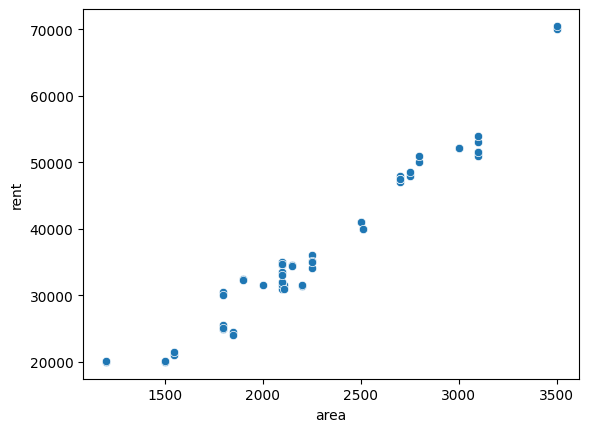

In [15]:
#plt.figure(figsize=(10,8))
#plt.title("Scatter plot showing rent and area")
#plt.xlabel("Area")
#plt.ylabel("Rent")
sns.scatterplot(x=df['area'],y=df['rent'])
#plt.show()

<Axes: xlabel='area', ylabel='rent'>

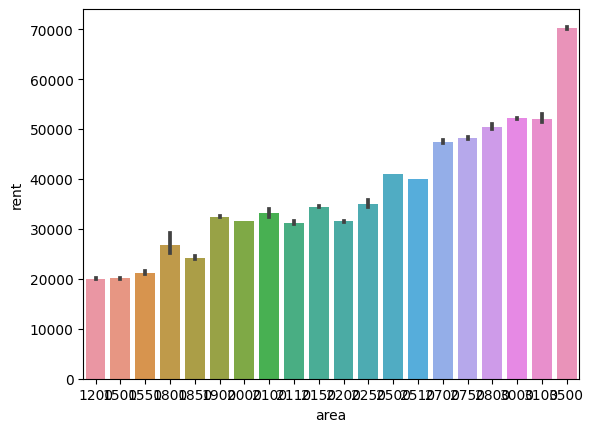

In [19]:
sns.barplot(x=df['area'],y=df['rent'])


<Axes: xlabel='area', ylabel='rent'>

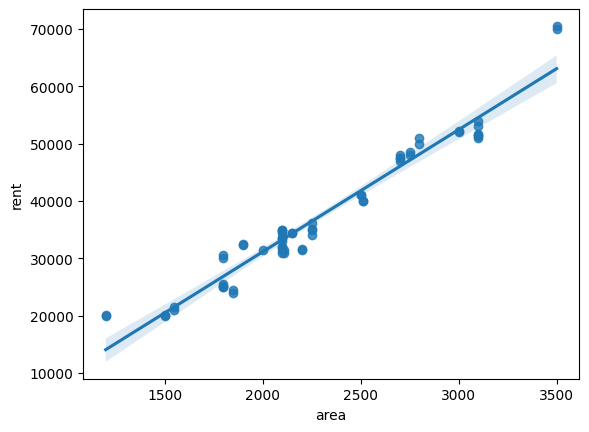

In [20]:
sns.regplot(x=df['area'],y=df['rent'])

#### Correlation

<Axes: >

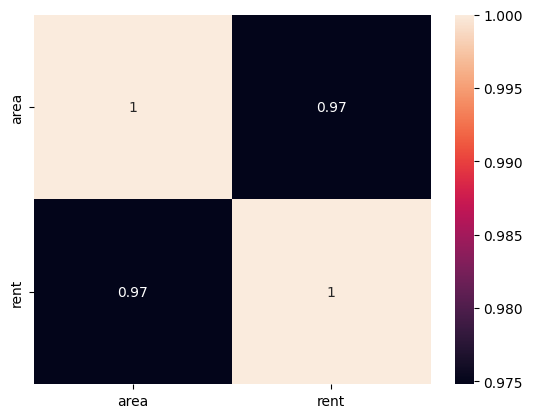

In [21]:
sns.heatmap(df.corr(),annot = True)

In [27]:
x = df.drop('rent', axis = 1)
y = df['rent']

In [28]:
x.columns

Index(['area'], dtype='object')

#### Model Training

#### Train Test Split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,
                                                   random_state = 11)
x_test

,area
38,2700
21,2100
43,2510
42,2100
19,2700
40,2150
9,2100
46,1800
2,2500
47,1550


#### Instantiating Linear Regression Model

In [32]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train) # Training of Lienar Regression Model
# Gradient Descent Algorithm

LinearRegression()

In [33]:
np.around(linear_reg.coef_,2)

array([21.36])

In [34]:
linear_reg.intercept_

-11804.564145935015

#### Model Evaluation

In [36]:
y_pred = linear_reg.predict(x_test)
y_pred.size


12

In [37]:
x_test.size

12

In [39]:
y_test.size

12

In [40]:
residual = y_test - y_pred
residual

38    1636.616004
21     451.715591
43   -1805.269127
42    1651.715591
19    1136.616004
40     283.790626
9    -2048.284409
46    3359.265385
2     -541.684134
47     198.890213
54    3000.766073
5     3723.415453
Name: rent, dtype: float64

In [41]:
# Testing Data Evaluation
y_pred = linear_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error      :", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error     :",mae)

r2_value = r2_score(y_test, y_pred)
print("R-Squared Value         :",r2_value)

n = x_test.shape[0]
k = x_test.shape[1]
adj_r2 = 1 - ((1 - r2_value) * (n-1))/(n-k-1)
print("Adjusted R-Squared Value:",adj_r2)

Mean Squared Error      : 4076973.71815316
Root Mean Squared Error : 2019.151732325523
Mean Absolute Error     : 1653.1690507121268
R-Squared Value         : 0.938956084015983
Adjusted R-Squared Value: 0.9328516924175813


In [43]:
 y_train.size

48

In [45]:
 #y_pred_train.size

In [46]:
# Training Data Evaluation
y_pred_train = linear_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error      :", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error     :",mae)

r2_value = r2_score(y_train, y_pred_train)
print("R-Squared Value         :",r2_value)

n = x_train.shape[0]
k = x_train.shape[1]
adj_r2 = 1 - ((1 - r2_value) * (n-1))/(n-k-1)
print("Adjusted R-Squared Value:",adj_r2)

Mean Squared Error      : 7497278.205198799
Root Mean Squared Error : 2738.1158129631403
Mean Absolute Error     : 2067.943440023549
R-Squared Value         : 0.9511844628364281
Adjusted R-Squared Value: 0.9501232555067852


#### Assumption

#### Normality of Residual

In [47]:
residual = y_train - y_pred_train # Yact - Ypred
residual

52    7549.816555
22    7049.816555
58   -3624.134340
8     2136.616004
59   -2806.783721
26    1068.691038
51     -48.284409
14   -2152.059306
41   -1028.284409
39   -1548.284409
30     451.715591
31    1961.715591
23    6174.364972
35    3523.415453
15   -2906.783721
0      587.565522
29   -3006.783721
50   -2261.869402
11   -1048.284409
6     -233.184822
3     -152.059306
36     -33.184822
49    1636.616004
57   -1540.734615
56    1568.691038
20   -1761.869402
37   -3708.659581
10     383.790626
1     1951.715591
53    6274.364972
34     -70.933790
4     -170.933790
44   -1252.059306
48   -1140.734615
32    -491.684134
28   -3724.134340
45   -3406.783721
24    2000.766073
18   -1640.734615
7    -3208.659581
33   -1152.059306
12    1451.715591
13   -1755.269127
55    -406.783721
17    -301.109787
27   -1640.734615
16    3859.265385
25   -1406.783721
Name: rent, dtype: float64

#### Visualization Tools

#### 1. kdeplot

<Axes: xlabel='rent', ylabel='Density'>

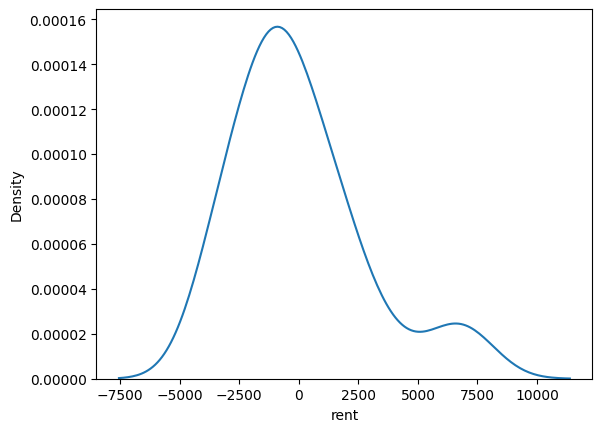

In [48]:
sns.kdeplot(residual)

<Axes: xlabel='rent', ylabel='Density'>

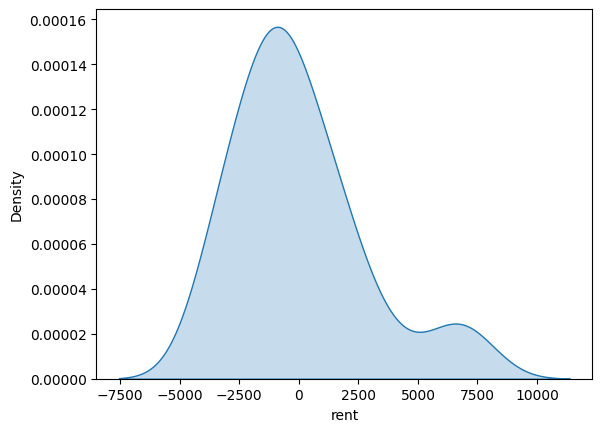

In [49]:
sns.kdeplot(residual, fill = True)

<Axes: xlabel='rent', ylabel='Count'>

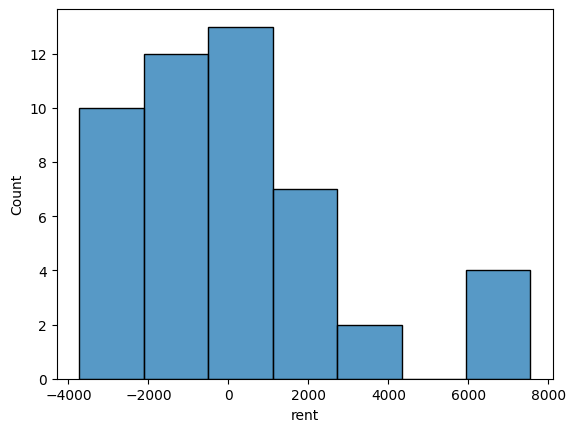

In [50]:
sns.histplot(residual)

<Axes: xlabel='rent', ylabel='Count'>

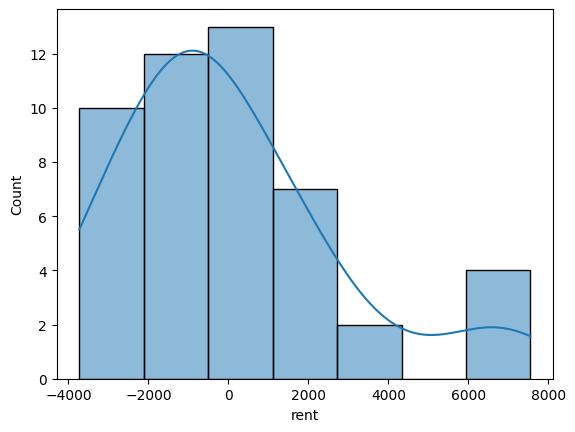

In [51]:
sns.histplot(residual, kde = True)

#### distplot

<Axes: xlabel='rent', ylabel='Density'>

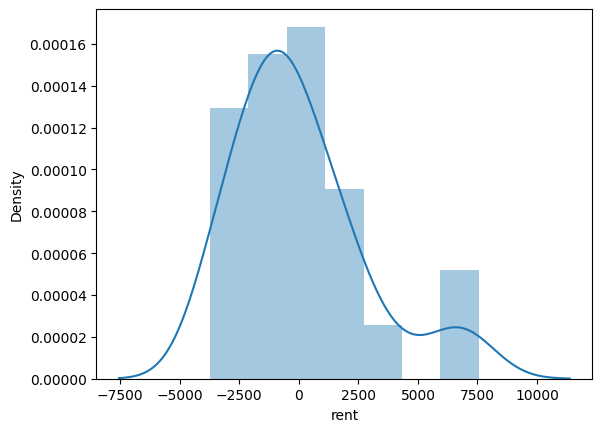

In [52]:
sns.distplot(residual)

#### QQ Plot

In [53]:
import statsmodels.api as sm

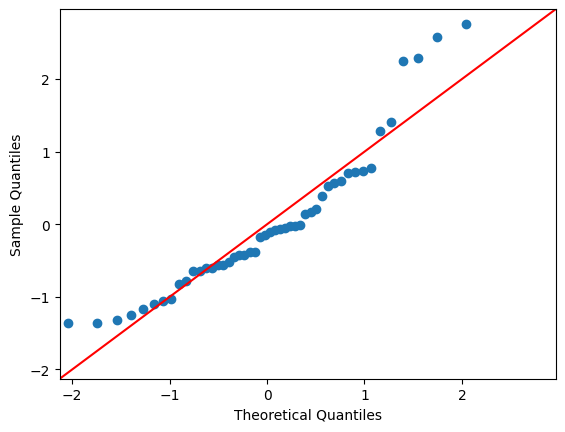

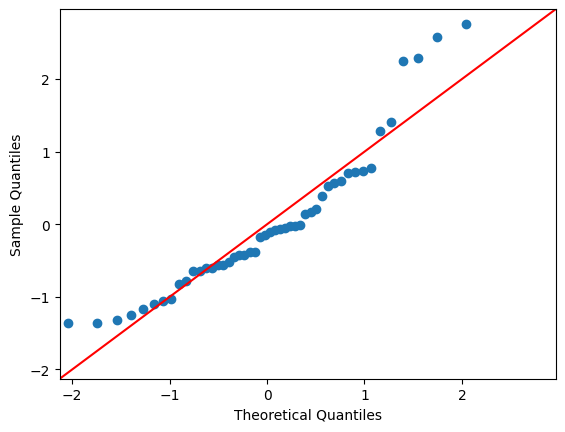

In [54]:
sm.qqplot(residual, line='45', fit = True)

#### Hypothesis Testing

#### shapiro

In [55]:
from scipy.stats import shapiro

In [56]:
stats, p_val = shapiro(residual)
print(stats)
print(p_val)

0.9059848189353943
0.0009866835316643119


In [57]:
_, p_val = shapiro(residual)
print("P Value is :", p_val)

if p_val >= 0.05:
    print("Data is normally distributed")
    print("NULL Hypothesis is True")
    
else:
    print("Data is not normally distributed")
    print("Alternate Hypothesis is True")

P Value is : 0.0009866835316643119
Data is not normally distributed
Alternate Hypothesis is True


#### ks Test

In [58]:
from scipy.stats import kstest

In [59]:
_, p_val = kstest(residual,'norm')
print("P Value is :", p_val)

if p_val >= 0.05:
    print("Data is normally distributed")
    print("NULL Hypothesis is True")
    
else:
    print("Data is not normally distributed")
    print("Alternate Hypothesis is True")

P Value is : 4.7347287239123075e-20
Data is not normally distributed
Alternate Hypothesis is True


#### normaltest

In [60]:
from scipy.stats import normaltest

In [61]:
_, p_val = normaltest(residual)
print("P Value is :", p_val)

if p_val >= 0.05:
    print("Data is normally distributed")
    print("NULL Hypothesis is True")
    
else:
    print("Data is not normally distributed")
    print("Alternate Hypothesis is True")

P Value is : 0.004480737008275951
Data is not normally distributed
Alternate Hypothesis is True


#### skewness

In [62]:
from scipy.stats import skew

Mean     : 37269.166666666664
Median   : 34450.0
Skewness : 0.718168378298872
Skewness : 0.7000880124443039


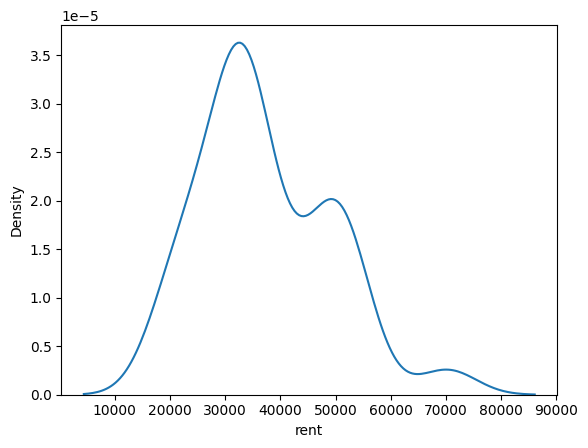

In [64]:
sns.kdeplot(df['rent'])
s1 = df['rent']
print('Mean     :',s1.mean())
print('Median   :',s1.median())
print('Skewness :',s1.skew())
print('Skewness :',skew(s1))

#### Homoscedascticity

In [66]:
y_pred_train
residual_train = y_train - y_pred_train
residual_train

52    7549.816555
22    7049.816555
58   -3624.134340
8     2136.616004
59   -2806.783721
26    1068.691038
51     -48.284409
14   -2152.059306
41   -1028.284409
39   -1548.284409
30     451.715591
31    1961.715591
23    6174.364972
35    3523.415453
15   -2906.783721
0      587.565522
29   -3006.783721
50   -2261.869402
11   -1048.284409
6     -233.184822
3     -152.059306
36     -33.184822
49    1636.616004
57   -1540.734615
56    1568.691038
20   -1761.869402
37   -3708.659581
10     383.790626
1     1951.715591
53    6274.364972
34     -70.933790
4     -170.933790
44   -1252.059306
48   -1140.734615
32    -491.684134
28   -3724.134340
45   -3406.783721
24    2000.766073
18   -1640.734615
7    -3208.659581
33   -1152.059306
12    1451.715591
13   -1755.269127
55    -406.783721
17    -301.109787
27   -1640.734615
16    3859.265385
25   -1406.783721
Name: rent, dtype: float64

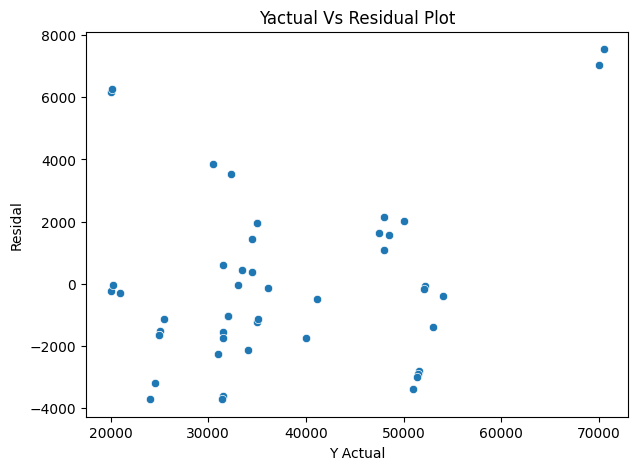

In [67]:
plt.figure(figsize = (7,5))
sns.scatterplot(x = y_train, y = residual_train)
plt.xlabel('Y Actual')
plt.ylabel("Residal")
plt.title("Yactual Vs Residual Plot")
plt.savefig('Homoscedasticity.png')

#### Single Row Testing

In [90]:
x_test[10:11]

array([[2800]], dtype=int64)

In [92]:
linear_reg.predict(x_test[10:11])[0]

47999.23392717616

In [93]:
column_names = x.columns.tolist()
column_names

['area']

In [94]:
x.shape[1]

1

In [95]:
linear_reg.n_features_in_

1

In [98]:
area = 5000
test_array = np.zeros([1,linear_reg.n_features_in_])
test_array[0,0] = area
predicted_charges = np.around(linear_reg.predict(test_array)[0],3)

In [100]:
import pickle

In [101]:
with open('linear_regression.pkl','wb') as f:
    pickle.dump(linear_reg, f)